# Eksamen Fys1120 H2022 Oppgave 1 - Elektrisk felt

Vi skal i denne oppgaven studere det elektriske feltet rundt en endelig linjeladning som ligger langs $z$-aksen. Linjeladningen har en linjeladningsfordeling $\rho$.

### Oppgave (a) 
Vis at det elektriske feltet fra en uendelig lang linjeladning med uniform linjeladningstetthet $\rho(z) = \rho$ er gitt som 
$$E_r(r) = \frac{\rho}{2 \pi \epsilon_0 r}\hat{r}$$
hvor $r$ er avstanden inn til $z$-aksen og $\hat{r}$ er en enhetsvektor i radiell retning i sylinderkoordinater (Du kan ikke levere en figur, så du må forklare hva du gjør med ord. Det er tilstrekkelig med en kort forklaring)

(*Svar ved å trykke i denne cellen og skriv svaret her*)

(__Tips__ Du kan trykke på oppgave-cellene også og kopiere LaTeX koden derfra hvis du trenger den)

__Løsning__ Vi bruker Gauss lov. Vi velger sylinderkoordindater fordi systemet har rotasjonssymmetri om $z$-aksen og translasjonssymmetri langs $z$-aksen. Det elektriske feltet vil derfor kun ha en radiell komponent og kun kunne avhenge av $r$. Som Gauss-flate velger vi en sylinder. Det vil ikke gå noe fluks ut gjennom toppen eller bunnen av sylinderen fordi det elektriske feltet ikke har noen komponent i $z$-retningen. Gauss lov gir derfor
$$\int_S \vec{E} \cdot d \vec{S} = 2 \pi r L E_r = \rho L / \epsilon_0$$
som gir at
$$E_r = \frac{\rho}{2 \pi \epsilon_0 r}$$

### Eksempel
Som en hjelp til å løse oppgaven, kan du ta utgangspunkt i dette eksempelet.

Det elektriske feltet fra en dipol langs $x$-aksen kan beregnes og visualiseres ved hjelp av følgende program.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def efieldlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    E = np.zeros(np.shape(r))
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        E = E + qi*Ri/Rinorm**3
    E = E*K
    return E
def findfield(R,Q,x0,x1,y0,y1,Nx,Ny): 
    x = np.linspace(x0,x1,Nx)
    y = np.linspace(y0,y1,Ny)
    rx,ry = np.meshgrid(x,y)
    # Set up electric field
    Ex = np.zeros((Nx,Ny),float)
    Ey = np.zeros((Nx,Ny),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],ry.flat[i]])
        Ex.flat[i],Ey.flat[i] = efieldlist(r,Q,R) 
    return x,y,rx,ry,Ex,Ey

In [30]:
Q = []
R = []
a = 1.0
q = 1.0
R.append(np.array([-a/2,0]))
Q.append(-q)
R.append(np.array([a/2,0]))
Q.append(q)
x,y,rx,ry,Ex,Ey = findfield(R,Q,-1*a,1*a,-1*a,1*a,30,30)

(-1.0, 1.0975029726516063, -1.0, 1.0975029726516063)

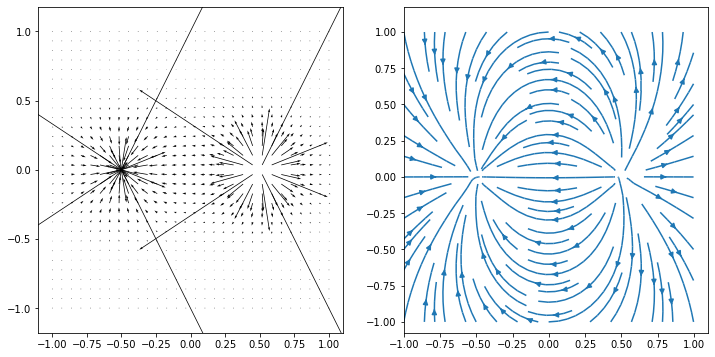

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.quiver(rx,ry,Ex,Ey)
plt.axis('equal')
plt.subplot(1,2,2)
plt.streamplot(rx,ry,Ex,Ey)
plt.axis('equal')

## Endelig linjestykke
Vi skal nå se på en linjeladning fra $-a/2$ til $a/2$ hvor $a = 1 \text{cm}$. Hele linjestykket har ladningen $Q = 1 \text{mC}$.

### Oppgave (b)

Skriv et program som finner det elektriske feltet og visualiser feltet i et passende område slik at feltets form klart kommer frem.

In [4]:
# (Svar)

In [63]:
# (Løsning)
Q = []
R = []
a = 1.0e-2
q = 1.0e-3
N = 100 # Antall punkter
for iz in range(N+1):
    z = -a/2 + (iz/N)*a
    x = 0.0
    R.append(np.array([x,z]))
    Q.append(q/(N+1))

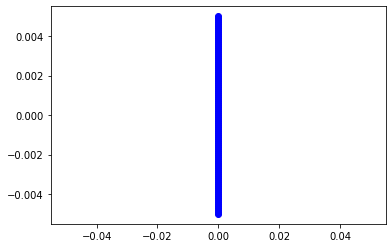

In [64]:
# Vi sjekker at vi har fått riktige punkter ved å plotte dem
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'ob')

In [65]:
# Vi finner feltet i xz planet
x,z,rx,rz,Ex,Ez = findfield(R,Q,-a,a,-a,a,30,30)

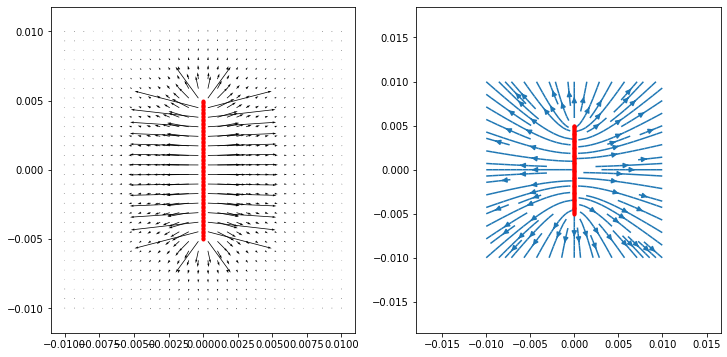

In [93]:
# Vi plotter feltet i xz planet
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Ex,Ez)
plt.axis('equal')
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'.r')
plt.subplot(1,2,2)
plt.streamplot(rx,rz,Ex,Ez)
plt.axis('equal')
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'.r')

## Sammenlikning med teori nær linjestykket

## Oppgave (c)
Forklar kort hvorfor du forventer at det elektriske feltet du fant for den uendelig lange linjen er en god modell for det elektriske feltet fra linjestykket når du er nær linjestykket.

(*Svar*)

__Løsning__ Når avstanden til linjen er mye mindre enn lengden på linjen, vil kant-effektene bli ubetydelige, og linjen vil fremstå som tilnærmet uendelig lang.

### Oppgave (d)
Vi ønsker å sammenlikne resutatet vi fant for den uendelig lange linjen med resultatet for linjestykket som du finner med programmet ditt. Lag et plot av $E_r(r,z)$ for $r = a/10$ og sammenlikn med resultatet for den uendelig lange linjen.

In [9]:
# (Svar)

Text(0, 0.5, '$E$ (V/m)')

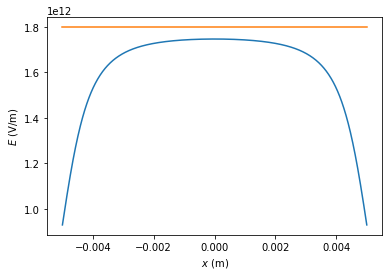

In [91]:
# (Løsning)
# Først finner vi den numeriske løsningen
xi = a/10
Nz = 1000
z = np.zeros(Nz+1)
Er = np.zeros(Nz+1)
for iz in range(Nz+1):
    zi = -a/2 + (iz/Nz)*a
    z[iz] = zi
    ri = np.array([xi,zi])
    Exi,Ezi = efieldlist(ri,Q,R)
    Er[iz] = Exi
plt.plot(z,Er)
# Så sammenlikner vi med den uendelig lange linjen
rho = q/a
epsilon0 = 8.854e-12
Ez_teori = rho/(2*np.pi*epsilon0*xi)
plt.plot([-a/2,a/2],[Ez_teori,Ez_teori])
plt.xlabel('$x (m)')
plt.ylabel('$E$ (V/m)')

## Sammenlikning med teori langt vekk fra linjestykket

### Oppgave (e)
Hva forventer du at det elektriske feltet $E_r(r,z)$ vil være for $z=0$ når $r\gg a$? Du skal komme fram til et enkelt uttrykk for $E_r(r,z)$ og gi en kort forklaring for hvorfor dette uttrykket er en god tilnærming i den oppgitte grensen.

(*Svar*)

__Løsning__ Langt vekk fra linjestykket vil det fremstå som en punktlandning i origo. Derfor vil det elektrsiek feltet ha samme form som feltet som en punktladning:

$$E_r = \frac{Q}{4 \pi r^2}\hat{r}$$

Langs $x$-aksen vil derfor uttrykket være:

$$E_x = \frac{Q}{4 \pi x^2}$$

### Oppgave (f)
Sammenlikn resultatet fra programmet ditt med det forenklede uttrykket for $E_r(r,z)$ for $z=0$ ved for eksempel å plotte $E_r(r,z)$ fra $r_0=a/2+0.1$ til $r_1 = r_0 + 10a$. 

In [ ]:
# Svare

/Users/malthe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/malthe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


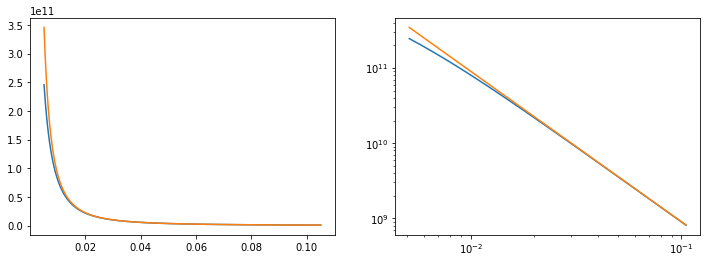

In [90]:
# Løsning
plt.figure(figsize=(12,4))
Nx = 1000
dx = 10*a
x = np.zeros(Nx+1)
Er = np.zeros(Nx+1)
zi = 0
for ix in range(Nx+1):
    xi = a/2+0.01*a+(ix/Nx)*dx
    x[ix] = xi
    ri = np.array([xi,zi])
    Exi,Ezi = efieldlist(ri,Q,R)
    Er[ix] = Exi
plt.subplot(1,2,1)
plt.plot(x,Er)
plt.subplot(1,2,2)
plt.loglog(x,Er)
# Så sammenlikner vi med en punktladning
rho = q/a
epsilon0 = 8.854e-12
Ez_teori = q/(4*np.pi*epsilon0*x**2)
plt.subplot(1,2,1)
plt.plot(x,Ez_teori)
plt.subplot(1,2,2)
plt.loglog(x,Ez_teori)